<a href="https://colab.research.google.com/github/leandroboteon/data-wrangling-marketing-rfm/blob/main/data_wrangling_marketing_rfm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tratamento de dados de marketing e levantamento do RFM dos clientes**

## Contexto
Neste projeto, foram realizados processos de data cleaning e data wrangling para tratar os dados de marketing de uma empresa do ramo de e-commerce a fim de realizar análises visuais de algumas métricas e da recência, frequência e ticket médio (RFM) dos seus clientes.

### RFM
- **R (Recency):** Tempo que o cliente realizou a última compra (em dias).
- **F (Frequency):** Quantidade de compras realizadas pelo cliente.
- **M (Monetary):** Valor do ticket médio gasto pelo cliente, calculado como a média do total gasto por pedido para cada cliente.

## Sobre os Dados
-

A tabela contém informações de compras de um e-commerce em 37 países, incluindo:
- `CustomerID`: Código de identificação do cliente.
- `Description`: Descrição do produto.
- `InvoiceNo`: Código da fatura.
- `StockCode`: Código de estoque do produto.
- `Quantity`: Quantidade do produto.
- `InvoiceDate`: Data do faturamento (compra).
- `UnitPrice`: Preço unitário do produto.
- `Country`: País da compra.

### Etapa 1: Leitura e Inspeção dos Dados
1. Foi lido o dataset.
2. Utilizou-se o método `describe` para verificar a distribuição dos dados.
3. Analisou-se o tipo dos dados.

In [1]:
# importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar dados
df = pd.read_csv('/content/drive/MyDrive/Formação em Dados/Desafio 05/dnc_desafio_5.csv')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611121,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Etapa 2: Tratamento de Valores Faltantes
1. Foram verificados os valores nulos com `isna` e utilizou-se a função `sum` para somar a quantidade de nulos.
2. Utilizou-se a função `dropna` para remover os valores nulos.

In [6]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df = df.dropna()

### Etapa 3: Tratamento de Preços Unitários e Quantidades
1. Verificou-se se existiam dados nulos ou menor que zero na coluna de preços.
2. Filtrou-se o dataset para conter apenas preços acima de zero.
3. Verificou-se se existiam dados nulos ou menor que zero na coluna de quantidade.
4. Filtrou-se o dataset para conter apenas quantidades acima de zero.

In [8]:
# preço menor ou igual a zero
invalido = df[df['UnitPrice'] <= 0]
invalido.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom


In [9]:
# considerando preços maior que zero
df = df[df['UnitPrice'] > 0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 08:26,3.39,17850.0,United Kingdom


In [10]:
# dados nulos ou menor que zero na coluna quantidade
df[(df['Quantity'] < 0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [11]:
df = df[df['Quantity'] > 0]

### Etapa 4: Remoção de Linhas Duplicadas
1. Verificou-se se havia linhas duplicadas com a função `duplicated`.
2. Removeram-se as linhas duplicadas utilizando a função `drop_duplicates`.

In [12]:
# verificar se há linhas duplicadas
df.duplicated().sum()

5192

In [13]:
# drop duplicatas
df = df.drop_duplicates()

### Etapa 5: Correção dos Tipos de Dados
1. Corrigiu-se o tipo de dado da coluna `InvoiceDate`.
2. Corrigiu-se o tipo de dado da coluna `CustomerID`.

In [14]:
# tipo de dados
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [15]:
# InvoiceDate para datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
# CustomerID para int
df['CustomerID'] = df['CustomerID'].astype(int)

### Etapa 6: Tratamento de Outliers
1. Visualizou-se a presença de outliers através de um boxplot da biblioteca `Seaborn`.
2. Removeram-se os outliers extremos em que a quantidade do item na compra era superior a 10.000, e o preço unitário era maior que 5.000.

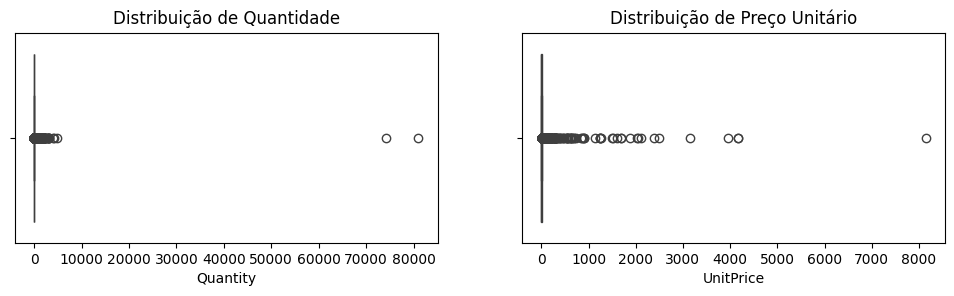

In [17]:
# identificando Outliers através de boxplot
plt.figure(figsize=(12, 6))

# Quantity
plt.subplot(2, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Distribuição de Quantidade')

# UnitPrice
plt.subplot(2, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Distribuição de Preço Unitário');

In [18]:
# remover os outliers em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000
df = df[(df['Quantity'] < 10000) & (df['UnitPrice'] < 5000)]

### Etapa 7: Criação de Coluna Adicional
1. Criação da coluna `TotalPrice` (preço total) a partir  da multiplicação das colunas `Quantity` e `UnitPrice`.

In [19]:
# preço total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Etapa 8: Cálculo da Última Data de Compra
1. Criação da variável `recency_date` através da função `max` para calcular a data da última compra no dataset.

In [20]:
# data da última compra
recency_date = df['InvoiceDate'].max()

### Etapa 9: Visualização dos Dados utilizando a biblioteca seaborn
1. Top 10 países com maior valor em vendas.
2. Top 10 produtos mais vendidos.
3. Valor de venda total por mês.
4. Valor de venda total por mês e por país (top 10).


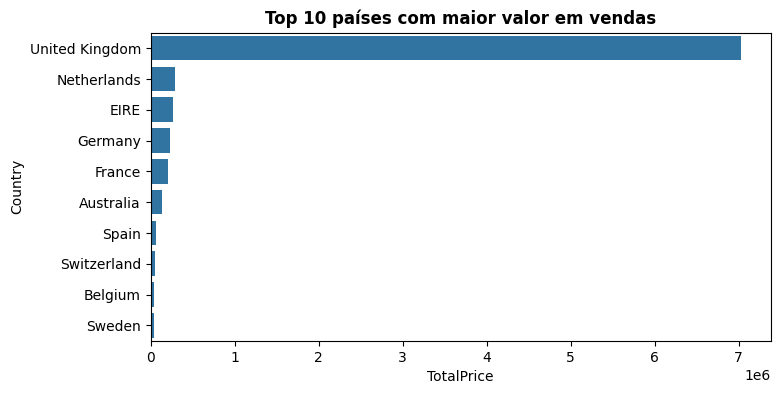

In [21]:
# Top 10 países com maior valor em vendas
top_10_countries = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(8, 4))

sns.barplot(x='TotalPrice', y='Country', data=top_10_countries)
plt.title('Top 10 países com maior valor em vendas', fontweight='bold');

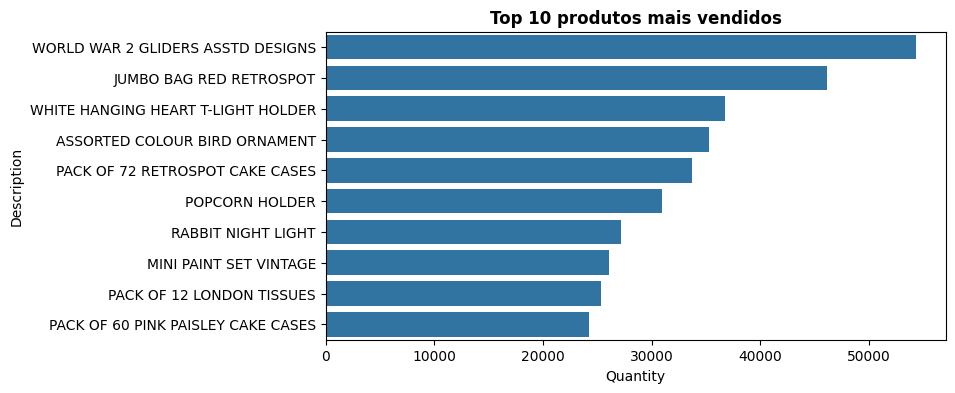

In [22]:
# Top 10 produtos mais vendidos
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index().head(10)
top_products

plt.figure(figsize=(8, 4))

sns.barplot(x='Quantity', y='Description', data=top_products)
plt.title('Top 10 produtos mais vendidos', fontweight='bold');

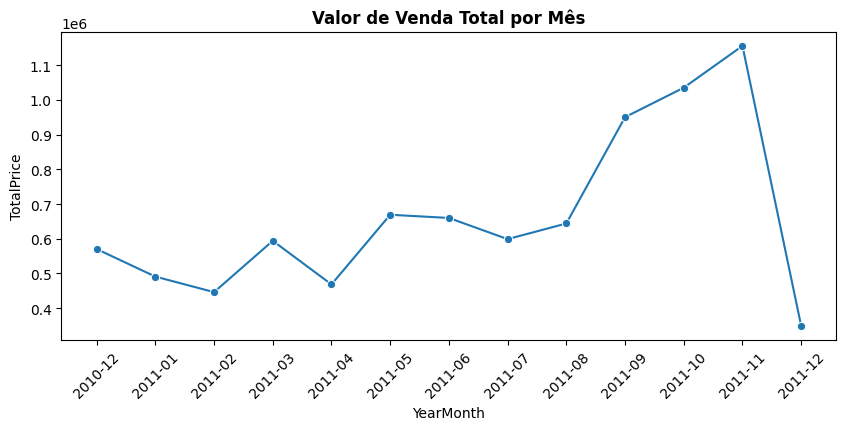

In [23]:
# Valor de venda total por mês
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()

plt.figure(figsize=(10, 4))

sns.lineplot(data=monthly_sales, x='YearMonth', y='TotalPrice', marker='o')
plt.title('Valor de Venda Total por Mês', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

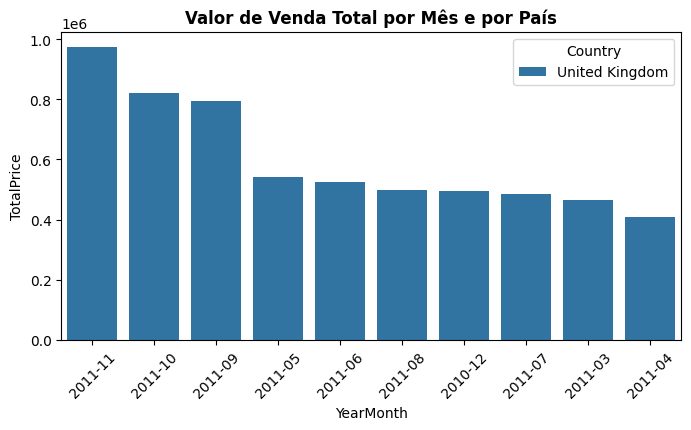

In [24]:
# Valor de venda total por mês e por país (considere apenas os top 10)
top_10_month_countries = df.groupby(['YearMonth','Country'])['TotalPrice'].sum().sort_values(ascending=False).reset_index().head(10)
top_10_month_countries

plt.figure(figsize=(8, 4))

sns.barplot(data=top_10_month_countries, x='YearMonth', y='TotalPrice', hue='Country')
plt.title('Valor de Venda Total por Mês e por País', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

### Etapa 10: Cálculo do RFM
1. Agrupamento dos dados por cliente e pedido/compra (`InvoiceNo`) a fim de obter a data e o preço total do pedido.
2. Por fim, agrupamento apenas por cliente e cálculo do RFM:
   - **R (Recency):** Diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados.
   - **F (Frequency):** Quantidade de compras feitas pelo cliente.
   - **M (Monetary):** Média das compras feitas pelo cliente.

In [25]:
# agrupar os dados por cliente e pedido/compra (InvoiceNo) e obter a data e o preço total do pedido
df_customer_purchase = df.groupby(['CustomerID', 'InvoiceNo'])[['InvoiceDate', 'TotalPrice']].first().reset_index()
df_customer_purchase.head()

,CustomerID,InvoiceNo,InvoiceDate,TotalPrice
0,12347,537626,2010-12-07 14:57:00,25.20
1,12347,542237,2011-01-26 14:30:00,20.40
2,12347,549222,2011-04-07 10:43:00,17.00
3,12347,556201,2011-06-09 13:01:00,24.96
4,12347,562032,2011-08-02 08:48:00,13.20


In [26]:
# agrupar novamente apenas por cliente e RFM
df_rfm = df_customer_purchase.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (recency_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'mean'
}).reset_index()

df_rfm.rename(columns={'InvoiceDate': 'Recencia', 'InvoiceNo': 'Frequencia', 'TotalPrice': 'TicketMedio'}, inplace=True)

### Visualizando o RFM e salvando em csv
1. Visualizar o dataframe **df_rfm**
2. Salvar o dataframe em CSV a partir do método `to_csv`.

In [27]:
df_rfm

,CustomerID,Recencia,Frequencia,TicketMedio
0,12347,1,7,23.308571
1,12348,74,4,82.840000
2,12349,18,1,15.000000
3,12350,309,1,25.200000
4,12352,35,8,67.037500
...,...,...,...,...
4332,18280,277,1,23.700000
4333,18281,180,1,5.040000
4334,18282,7,2,19.125000
4335,18283,3,16,4.171875


In [28]:
# salvar em csv
df_rfm.to_csv('rfm.csv', sep=',' ,index=False)